<a href="https://colab.research.google.com/github/Alinedev85/Analise-de-mercado-Dados-Azul-/blob/main/distribui%C3%A7%C3%A3o_acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
azul_df = yf.download("AZUL4.SA", start='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
azul_df.columns = ['Aberto', 'Alto', 'Baixo', 'Fechado', 'f.ajustado', 'Volume']


In [ ]:
print(azul_df.head())

            Aberto   Alto  Baixo  Fechado  f.ajustado    Volume
Date                                                           
2023-01-02   10.82  10.89  10.29    10.30       10.30   4640000
2023-01-03   10.43  10.68  10.08    10.16       10.16  10443000
2023-01-04   10.28  10.76  10.06    10.56       10.56  10861600
2023-01-05   10.63  11.55  10.40    11.55       11.55  17393500
2023-01-06   11.52  12.03  11.40    11.84       11.84  15117600


In [ ]:
azul_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2023-01-02 to 2024-01-30
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aberto      269 non-null    float64
 1   Alto        269 non-null    float64
 2   Baixo       269 non-null    float64
 3   Fechado     269 non-null    float64
 4   f.ajustado  269 non-null    float64
 5   Volume      269 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.7 KB


In [ ]:
azul_df.tail(5)

,Aberto,Alto,Baixo,Fechado,f.ajustado,Volume
Date,,,,,,
2024-01-24,13.73,13.86,13.27,13.27,13.27,9979200
2024-01-25,13.45,14.08,13.37,14.07,14.07,22540400
2024-01-26,14.18,14.36,13.80,14.27,14.27,19202600
2024-01-29,14.20,14.36,13.72,13.84,13.84,12002400
2024-01-30,13.75,13.97,13.26,13.26,13.26,11928700


In [ ]:
azul_df.to_csv('azul.csv')

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
azul_df = yf.download("AZUL4.SA", start='2023-01-01')

azul_df.to_excel("azul_data.xlsx", index=False)

import shutil
shutil.move("azul_data.xlsx", "/content/azul_data.xlsx")


[*********************100%%**********************]  1 of 1 completed


'/content/azul_data.xlsx'

In [ ]:
acoes = ['AZUL4.SA', 'GOLL4.SA']

In [ ]:
acoes_df = pd.DataFrame()
for acao in acoes:

  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
acoes_df

,AZUL4.SA,GOLL4.SA
Date,,
2017-04-11,22.400000,10.30
2017-04-12,22.959999,9.88
2017-04-13,22.990000,9.64
2017-04-17,22.850000,9.98
2017-04-18,23.910000,10.16
...,...,...
2024-01-24,13.270000,6.65
2024-01-25,14.070000,6.44
2024-01-26,14.270000,5.92


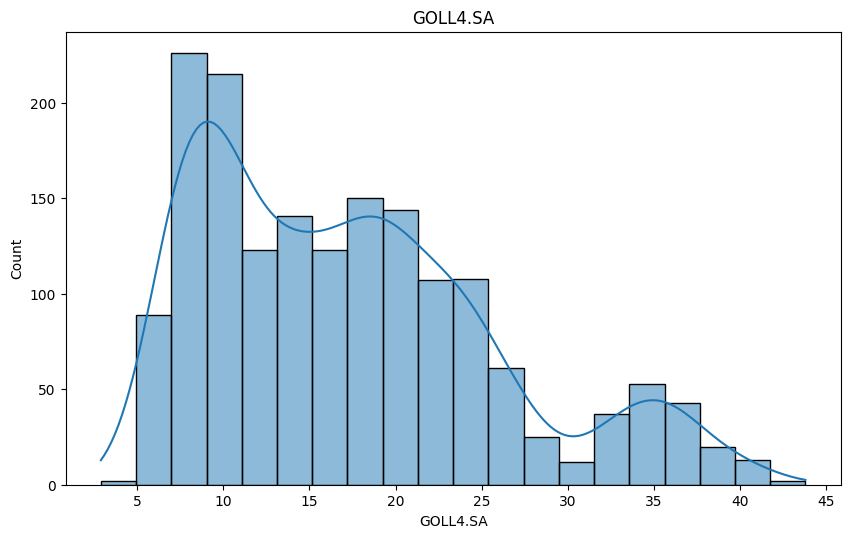

In [ ]:
plt.figure(figsize=(10,20))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(3, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


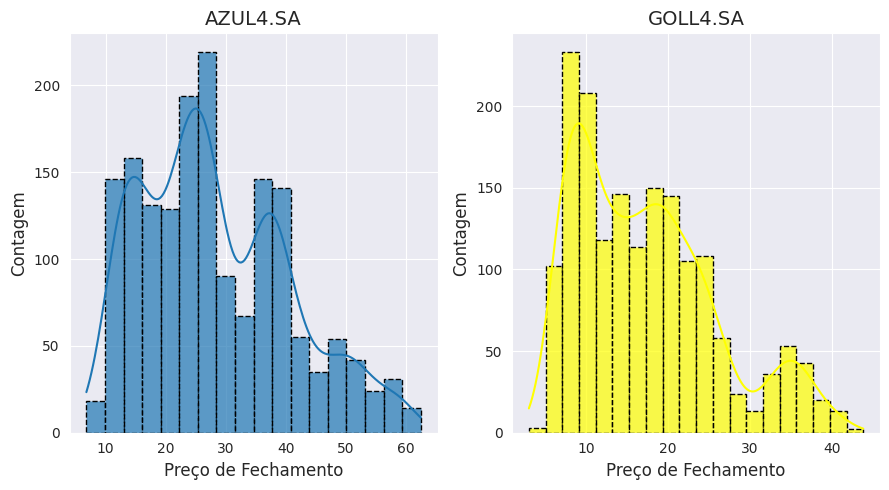

In [ ]:
sns.set_style("darkgrid")

acoes_df = pd.DataFrame()
acoes = ['AZUL4.SA', 'GOLL4.SA']

for acao in acoes:
    acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

plt.figure(figsize=(9, 5))
for i, acao in enumerate(acoes, start=1):
    plt.subplot(1, 2, i)
    if acao == 'GOLL4.SA':
        sns.histplot(acoes_df[acao], kde=True, color='yellow', edgecolor='black', linestyle='--', linewidth=1, alpha=0.7)
    else:
        sns.histplot(acoes_df[acao], kde=True, edgecolor='black', linestyle='--', linewidth=1, alpha=0.7)
    plt.title(acao, fontsize=14)
    plt.xlabel('Preço de Fechamento', fontsize=12)
    plt.ylabel('Contagem', fontsize=12)

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


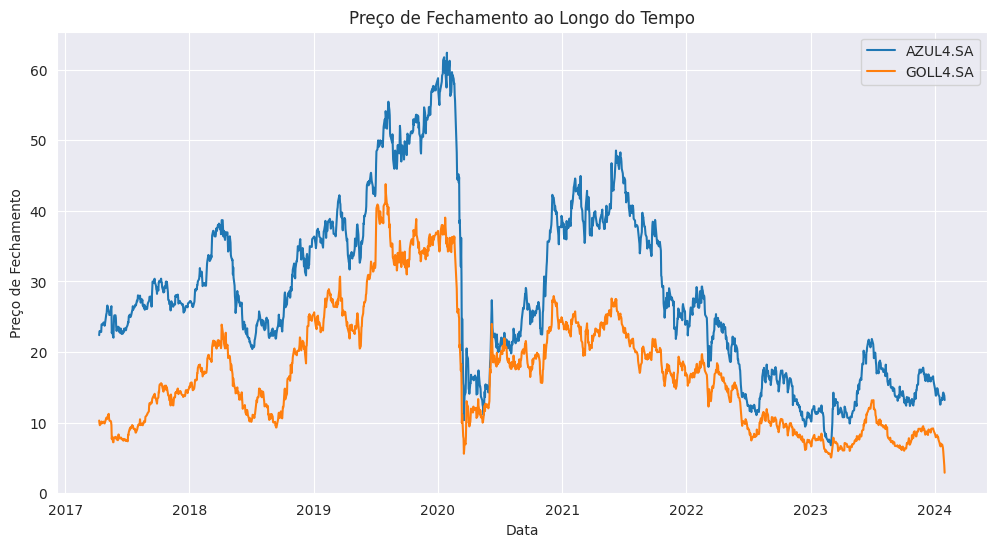

In [ ]:
acoes_df = pd.DataFrame()
acoes = ['AZUL4.SA', 'GOLL4.SA']

for acao in acoes:
    acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

plt.figure(figsize=(12, 6))
for acao in acoes:
    plt.plot(acoes_df.index, acoes_df[acao], label=acao)

plt.title('Preço de Fechamento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()